In [4]:
import numpy as np
x = np.array([-0.1, 1.0, 2.0])
x
y = x > 0
print(y)

[False  True  True]


In [5]:
y = y.astype(np.int)
print(y)

[0 1 1]


In [12]:
import matplotlib.pyplot as plt

def step_function(x):
    return np.array(x>0 , dtype=np.int)

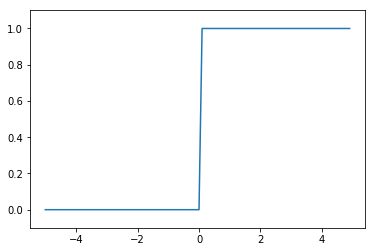

In [15]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

In [16]:
def sigmoid(x):
    return 1 / (1+ np.exp(-x))

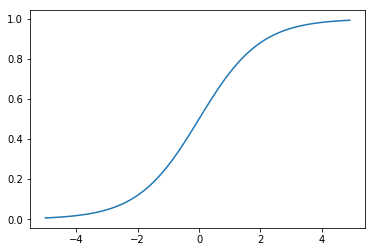

In [19]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.ylim(-0,1, 1,1)
plt.plot(x,y)
plt.show()

In [21]:
def relu(x):
    return np.maximum(0,x)

In [22]:
A = np.array([1,2,3,4])
print(A)

[1 2 3 4]


In [24]:
np.ndim(A)

1

In [26]:
A.shape

(4,)

In [27]:
A.shape[0]

4

In [29]:
B = np.array([[1,2],[3,4],[5,6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [30]:
np.ndim(B)

2

In [32]:
B.shape

(3, 2)

In [34]:
A = np.array([[1,2],[3,4]])
A.shape

(2, 2)

In [37]:
B = np.array([[5,6],[7,8]])
B.shape

(2, 2)

In [38]:
np.dot(A,B)

array([[19, 22],
       [43, 50]])

In [41]:
X = np.array([1,2])
X.shape

(2,)

In [42]:
W = np.array([[1, 3, 5],[2, 4, 6]])
print(W)

[[1 3 5]
 [2 4 6]]


In [43]:
W.shape

(2, 3)

In [44]:
Y = np.dot(X,W)

In [45]:
print(Y)

[ 5 11 17]


In [49]:
X = np.array([1.0, 5.0])
W1 = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X,W1) + B1
print(A1)

(2, 3)
(2,)
(3,)
[1.2 2.5 3.8]


In [50]:
Z1 = sigmoid(A1)

In [51]:
print(Z1)

[0.76852478 0.92414182 0.97811873]


In [52]:
W2 = np.array([[0.1, 0.4],[0.2, 0.5],[0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = Z1.dot(W2) + B2
Z2 = sigmoid(A2)

In [54]:
print(Z2)

[0.65816252 0.82582927]


In [55]:
def identity_function(x):
    return x

In [58]:
W3 = np.array([[0.1, 0.3],[0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = Z2.dot(W3) + B3
Z3 = identity_function(A3)

In [59]:
print(Z3)

[0.33098211 0.72778046]



 출력층의 활성화함수
 - 2클래스 분류 : 시그모이드함수
 - 다중클래스 분류 : 소프트맥스함수
 - 회귀 : 항등함수
##    

In [62]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1'] = np.array([0.1,0.2,0.3])
    network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2'] = np.array([0.1,0.2])
    network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

In [68]:
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = x.dot(W1) + b1
    z1 = sigmoid(a1)
    a2 = z1.dot(W2) + b2
    z2 = sigmoid(a2)
    a3 = z2.dot(W3) + b3
    y = identity_function(a3)
    
    return y

In [72]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


In [73]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [74]:
sum_exp = np.sum(exp_a)
print(sum_exp)

74.1221542101633


In [75]:
y = exp_a/sum_exp
print(y)

[0.01821127 0.24519181 0.73659691]


In [76]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c) # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a/sum_exp_a
    
    return y

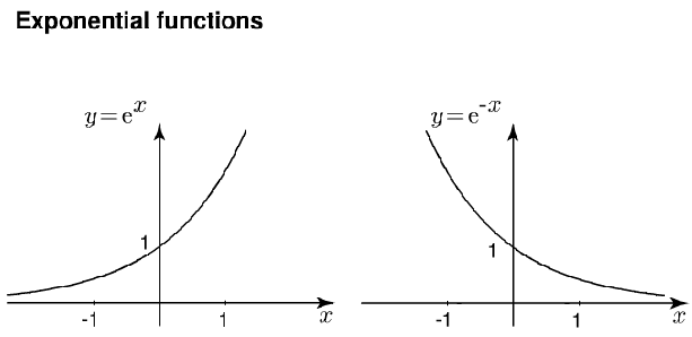